### Part I. Forming factors

#### 0. Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
path = 'ProblemSet2.xls'
pf = pd.read_excel(path, sheet_name='25 Size and BEME portfolios')
ff = pd.read_excel(path, sheet_name='Fama-French factors')
mf = pd.read_excel(path, sheet_name='Macroeconomic factors')

pf.head()

,Unnamed: 0,Average,Value,Weighted,Returns,--,Monthly,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Size,Small,Small,Small,Small,Small,2,2.00,2.00,2.00,...,4,4.00,4.00,4.00,4,Big,Big,Big,Big,Big
1,BE/ME,Low,2,3,4,High,Low,2.00,3.00,4.00,...,Low,2.00,3.00,4.00,High,Low,2,3,4,High
2,192607,3.61,-3.69,-0.64,-1.42,-0.64,3.42,3.26,2.42,-1.27,...,3.29,1.24,1.29,0.55,2.56,3.18,6.08,2,2.93,0.56
3,192608,-1.94,-6.78,3.81,1.21,4.82,1.59,-2.91,3.02,2.14,...,0.76,4.11,1.93,2.13,4.47,1.17,4.1,1.82,5.64,7.76
4,192609,-6.41,3.45,-5.19,3.08,0.75,-2.81,-2.32,1.15,-1.54,...,1.87,-0.08,-1.84,1.56,2.18,-1.37,3.66,-0.23,-0.3,-2.43


In [3]:
print(ff.head())

   Unnamed: 0  Mkt-RF   SMB   HML    RF
0      192607    2.65 -2.16 -2.92  0.22
1      192608    2.58 -1.49  4.88  0.25
2      192609    0.37 -1.38 -0.01  0.23
3      192610   -3.46  0.04  0.71  0.32
4      192611    2.43 -0.24 -0.31  0.31


#### 1. 

In [4]:
# 1) 첫 컬럼 이름을 date로 바꾸기 change first column name to "date"
pf = pf.rename(columns={pf.columns[0]: "date"})

# 2) 헤더로 들어온 0,1행 제거 (Size / BE/ME 행) remove first two rows
pf_clean = pf.iloc[2:].copy()

# 3) date를 datetime으로 변환 (192607 형태) convert date to datetime
pf_clean["date"] = pf_clean["date"].astype(int).astype(str)
pf_clean["date"] = pd.PeriodIndex(pf_clean["date"], freq="M")

pf_clean = pf_clean.set_index("date")
R = pf_clean.apply(pd.to_numeric, errors="coerce") 

R.shape

(1038, 25)

In [5]:
# 1) S1B1 ~ S5B5 컬럼명 생성
new_cols = [f"S{s}B{b}" for s in range(1, 6) for b in range(1, 6)]

# 2) 컬럼 개수 확인 (안 맞으면 여기서 멈춰야 함)
assert len(new_cols) == R.shape[1]

# 3) 컬럼명 교체
R.columns = new_cols

R.head()

,S1B1,S1B2,S1B3,S1B4,S1B5,S2B1,S2B2,S2B3,S2B4,S2B5,...,S4B1,S4B2,S4B3,S4B4,S4B5,S5B1,S5B2,S5B3,S5B4,S5B5
date,,,,,,,,,,,,,,,,,,,,,
1926-07,3.61,-3.69,-0.64,-1.42,-0.64,3.42,3.26,2.42,-1.27,2.46,...,3.29,1.24,1.29,0.55,2.56,3.18,6.08,2.00,2.93,0.56
1926-08,-1.94,-6.78,3.81,1.21,4.82,1.59,-2.91,3.02,2.14,7.47,...,0.76,4.11,1.93,2.13,4.47,1.17,4.10,1.82,5.64,7.76
1926-09,-6.41,3.45,-5.19,3.08,0.75,-2.81,-2.32,1.15,-1.54,-2.61,...,1.87,-0.08,-1.84,1.56,2.18,-1.37,3.66,-0.23,-0.30,-2.43
1926-10,-8.66,-10.02,-3.80,0.04,-3.06,-3.65,-3.77,-7.02,-6.29,0.08,...,0.13,-1.71,-2.33,-2.93,-5.21,-3.14,-3.13,-2.21,-4.59,-5.81
1926-11,3.77,12.42,2.31,-3.36,1.40,1.50,-2.77,4.03,3.46,1.62,...,3.54,2.28,3.85,5.00,1.78,4.31,2.61,1.47,3.55,2.56


In [6]:
# R is now a DataFrame of numeric returns with date as index
R.head()

,S1B1,S1B2,S1B3,S1B4,S1B5,S2B1,S2B2,S2B3,S2B4,S2B5,...,S4B1,S4B2,S4B3,S4B4,S4B5,S5B1,S5B2,S5B3,S5B4,S5B5
date,,,,,,,,,,,,,,,,,,,,,
1926-07,3.61,-3.69,-0.64,-1.42,-0.64,3.42,3.26,2.42,-1.27,2.46,...,3.29,1.24,1.29,0.55,2.56,3.18,6.08,2.00,2.93,0.56
1926-08,-1.94,-6.78,3.81,1.21,4.82,1.59,-2.91,3.02,2.14,7.47,...,0.76,4.11,1.93,2.13,4.47,1.17,4.10,1.82,5.64,7.76
1926-09,-6.41,3.45,-5.19,3.08,0.75,-2.81,-2.32,1.15,-1.54,-2.61,...,1.87,-0.08,-1.84,1.56,2.18,-1.37,3.66,-0.23,-0.30,-2.43
1926-10,-8.66,-10.02,-3.80,0.04,-3.06,-3.65,-3.77,-7.02,-6.29,0.08,...,0.13,-1.71,-2.33,-2.93,-5.21,-3.14,-3.13,-2.21,-4.59,-5.81
1926-11,3.77,12.42,2.31,-3.36,1.40,1.50,-2.77,4.03,3.46,1.62,...,3.54,2.28,3.85,5.00,1.78,4.31,2.61,1.47,3.55,2.56


In [7]:
# RF is in the ff DataFrame
ff = ff.rename(columns={ff.columns[0]: "date"})
ff["date"] = ff["date"].astype(int).astype(str)
ff["date"] = pd.PeriodIndex(ff["date"], freq="M")
ff = ff.set_index("date")

RF = pd.to_numeric(ff["RF"], errors="coerce")
RF.head()

date
1926-07    0.22
1926-08    0.25
1926-09    0.23
1926-10    0.32
1926-11    0.31
Freq: M, Name: RF, dtype: float64

In [8]:
mf = mf.rename(columns={mf.columns[0]: "date"})
mf["date"] = mf["date"].astype(int).astype(str)
mf["date"] = pd.PeriodIndex(mf["date"], freq="M")
mf = mf.set_index("date")

In [9]:
# Align R and RF by their date indices
common = R.index.intersection(RF.index)
print("matched months:", len(common))
print("R months:", len(R.index), "RF months:", len(RF.index))

R = R.loc[common]
RF = RF.loc[common]

matched months: 1038
R months: 1038 RF months: 1038


In [10]:
# Calculate excess returns for each of the 25 portfolios 
Re = R.sub(RF, axis=0)   # (T x 25) - (T x 1)
print(Re.shape)

(1038, 25)


In [11]:
Re.head()

,S1B1,S1B2,S1B3,S1B4,S1B5,S2B1,S2B2,S2B3,S2B4,S2B5,...,S4B1,S4B2,S4B3,S4B4,S4B5,S5B1,S5B2,S5B3,S5B4,S5B5
date,,,,,,,,,,,,,,,,,,,,,
1926-07,3.39,-3.91,-0.86,-1.64,-0.86,3.20,3.04,2.20,-1.49,2.24,...,3.07,1.02,1.07,0.33,2.34,2.96,5.86,1.78,2.71,0.34
1926-08,-2.19,-7.03,3.56,0.96,4.57,1.34,-3.16,2.77,1.89,7.22,...,0.51,3.86,1.68,1.88,4.22,0.92,3.85,1.57,5.39,7.51
1926-09,-6.64,3.22,-5.42,2.85,0.52,-3.04,-2.55,0.92,-1.77,-2.84,...,1.64,-0.31,-2.07,1.33,1.95,-1.60,3.43,-0.46,-0.53,-2.66
1926-10,-8.98,-10.34,-4.12,-0.28,-3.38,-3.97,-4.09,-7.34,-6.61,-0.24,...,-0.19,-2.03,-2.65,-3.25,-5.53,-3.46,-3.45,-2.53,-4.91,-6.13
1926-11,3.46,12.11,2.00,-3.67,1.09,1.19,-3.08,3.72,3.15,1.31,...,3.23,1.97,3.54,4.69,1.47,4.00,2.30,1.16,3.24,2.25


In [12]:
# compute the sample covariance matrix of the excess returns
Cov_Re = Re.cov()
Cov_Re.shape

(25, 25)

In [13]:
Cov_Re

,S1B1,S1B2,S1B3,S1B4,S1B5,S2B1,S2B2,S2B3,S2B4,S2B5,...,S4B1,S4B2,S4B3,S4B4,S4B5,S5B1,S5B2,S5B3,S5B4,S5B5
S1B1,148.585183,87.227654,83.513788,82.550913,90.285754,74.726357,72.970110,68.395465,71.614228,82.723937,...,53.958385,54.289567,54.390532,63.570938,78.200758,43.631017,41.028763,46.018185,55.391259,70.238334
S1B2,87.227654,110.926462,80.099585,79.709804,87.491385,68.566671,73.223043,67.274008,68.003079,77.195050,...,47.685590,51.290680,53.073042,55.591747,72.011486,38.839277,36.568058,40.849378,49.928177,52.188139
S1B3,83.513788,80.099585,84.420260,72.216149,79.122405,61.666983,63.576043,60.019287,62.766243,70.636618,...,44.149838,48.473932,48.760958,53.160019,67.668819,36.659688,35.334611,38.975948,48.739482,54.884576
S1B4,82.550913,79.709804,72.216149,74.132381,77.667044,58.111927,62.310025,59.273300,61.264681,69.126181,...,40.673471,45.409588,46.735915,51.635882,65.851206,33.752026,33.183591,37.342288,46.684713,52.932421
S1B5,90.285754,87.491385,79.122405,77.667044,91.072836,62.720201,67.186154,63.652331,66.628603,78.252580,...,42.822057,49.201165,50.750760,56.612381,73.505731,35.563690,35.480636,40.520142,51.526164,60.474342
S2B1,74.726357,68.566671,61.666983,58.111927,62.720201,63.429825,56.029481,51.061383,51.287518,57.289909,...,43.974021,42.464445,41.599075,43.490889,53.357325,34.355374,32.063602,32.679188,38.315081,45.507026
S2B2,72.970110,73.223043,63.576043,62.310025,67.186154,56.029481,61.710637,54.707076,55.656049,61.810485,...,41.673818,44.584023,44.822181,47.641362,59.978133,34.180494,32.743824,35.867785,43.412952,48.308115
S2B3,68.395465,67.274008,60.019287,59.273300,63.652331,51.061383,54.707076,53.596109,53.098647,58.929556,...,37.919025,41.748730,42.565565,45.812861,57.905223,31.549428,30.795781,34.130536,41.805515,46.931400
S2B4,71.614228,68.003079,62.766243,61.264681,66.628603,51.287518,55.656049,53.098647,57.560049,62.222032,...,38.355197,43.267476,44.091009,48.651609,61.396791,32.211706,31.814312,36.255467,44.826098,51.279964
S2B5,82.723937,77.195050,70.636618,69.126181,78.252580,57.289909,61.810485,58.929556,62.222032,75.969540,...,42.077209,47.855397,49.435957,54.792507,70.777769,35.281490,35.382785,40.282739,50.863763,57.230172


In [14]:
# Form the principal components factors from the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(Cov_Re) # symmetric matrix -> stable

# Sort eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Take the first K=3 principal components
W = eigenvectors[:, :3] # (25 x 3)
top_3_eigenvalues = eigenvalues[:3]

print("Top 3 eigenvalues:", top_3_eigenvalues)

Top 3 eigenvalues: [1294.7169064   125.73372332   58.26281961]


In [15]:
W.shape

(25, 3)

In [16]:
pc_weights = pd.DataFrame(
    W,
    index=Re.columns,
    columns=["PC1_w", "PC2_w", "PC3_w"]
)

In [17]:
print("PC weights (first 10 rows):")
pc_weights

PC weights (first 10 rows):


,PC1_w,PC2_w,PC3_w
S1B1,-0.280384,0.056051,-0.732088
S1B2,-0.254913,0.184255,-0.129595
S1B3,-0.234578,0.085987,-0.078115
S1B4,-0.226076,0.083852,-0.120005
S1B5,-0.247995,0.070316,-0.148858
S2B1,-0.198208,0.087774,-0.113136
S2B2,-0.208412,0.078843,0.002177
S2B3,-0.196397,0.057213,0.021525
S2B4,-0.204410,0.033553,0.031182
S2B5,-0.231371,0.043399,-0.005839


In [18]:
# Form a time series of 3 factors which will be called as in-sample principal components factors
F_pc = Re.dot(W)  # (T x 25) . (25 x 3) = (T x 3)
F_pc.columns = ["PC1_in", "PC2_in", "PC3_in"]
F_pc.head(15)

,PC1_in,PC2_in,PC3_in
date,,,
1926-07,-4.846942,-0.274178,1.989671
1926-08,-10.526460,-7.820252,7.199894
1926-09,4.407167,1.937379,4.994896
1926-10,20.321201,1.330621,3.028554
1926-11,-12.665613,0.714683,1.896868
1926-12,-11.860757,-0.589392,-6.237491
1927-01,-3.430620,-5.023009,1.863848
1927-02,-29.942090,-0.445681,5.913196
1927-03,7.159511,1.955766,-2.832103


In [19]:
F_pc.shape

(1038, 3)

In [20]:
F_pc.describe().T

,count,mean,std,min,25%,50%,75%,max
PC1_in,1038.0,-4.139443,35.982175,-317.565121,-21.134004,-6.028237,12.531164,162.887862
PC2_in,1038.0,1.005737,11.213105,-22.980983,-2.550950,-0.131751,2.442754,113.031880
PC3_in,1038.0,0.875816,7.633009,-58.548210,-2.061797,1.094400,4.294216,74.268583


#### 2.

In [21]:
# Use odd months to compute the sample covariance matrix and apply the eigenvectors to even months
# Separate odd and even months
odd_months = Re.index[Re.index.to_timestamp().month % 2 == 1]
even_months = Re.index[Re.index.to_timestamp().month % 2 == 0]

Re_odd = Re.loc[odd_months]
Re_even = Re.loc[even_months]

Re_odd.shape, Re_even.shape

# Compute covariance matrix from odd months
Cov_Re_odd = Re_odd.cov()
print("Covariance matrix from odd months shape:", Cov_Re_odd.shape)

# Form the principal components factors from the odd months covariance matrix
eigenvalues_odd, eigenvectors_odd = np.linalg.eig(Cov_Re_odd)

# Sort eigenvalues and eigenvectors in descending order
idx_odd = eigenvalues_odd.argsort()[::-1]
eigenvalues_odd = eigenvalues_odd[idx_odd]
eigenvectors_odd = eigenvectors_odd[:, idx_odd]

# Take the first K=3 principal components
W_odd = eigenvectors_odd[:, :3] # (25 x 3)
top_3_eigenvalues_odd = eigenvalues_odd[:3]

print("Top 3 eigenvalues from odd months:", top_3_eigenvalues_odd)
print("W_odd shape:", W_odd.shape)

# Form out-of-sample principal components factors for even months
F_pc_even = Re_even.dot(W_odd)
F_pc_even.columns = ["PC1_out", "PC2_out", "PC3_out"]
F_pc_even.head(15)

Covariance matrix from odd months shape: (25, 25)
Top 3 eigenvalues from odd months: [1422.91131891  121.82575236   61.34933877]
W_odd shape: (25, 3)


,PC1_out,PC2_out,PC3_out
date,,,
1926-08,-10.502073,8.227008,-5.358004
1926-10,20.390948,-0.843211,-1.681927
1926-12,-12.204509,1.022540,4.879228
1927-02,-29.737105,0.155338,-4.645607
1927-04,-6.570433,-4.332171,5.181236
1927-06,5.986511,-7.178308,-0.319410
1927-08,-3.935788,2.896246,5.777822
1927-10,26.688434,-9.712421,-3.619661
1927-12,-11.971971,8.512567,-6.563694


In [22]:
# Use even months to compute the sample covariance matrix and apply the eigenvectors to odd months
# Compute covariance matrix from even months
Cov_Re_even = Re_even.cov()
print("Covariance matrix from even months shape:", Cov_Re_even.shape)

# Form the principal components factors from the even months covariance matrix
eigenvalues_even, eigenvectors_even = np.linalg.eigh(Cov_Re_even)
# Sort eigenvalues and eigenvectors in descending order
idx_even = eigenvalues_even.argsort()[::-1]
eigenvalues_even = eigenvalues_even[idx_even]
eigenvectors_even = eigenvectors_even[:, idx_even]

# Take the first K=3 principal components
W_even = eigenvectors_even[:, :3] # (25 x 3)
top_3_eigenvalues_even = eigenvalues_even[:3]   
print("Top 3 eigenvalues from even months:", top_3_eigenvalues_even)
print("W_even shape:", W_even.shape)
# Form out-of-sample principal components factors for odd months
F_pc_odd = Re_odd.dot(W_even)
F_pc_odd.columns = ["PC1_out", "PC2_out", "PC3_out"]
F_pc_odd.head(15)

Covariance matrix from even months shape: (25, 25)
Top 3 eigenvalues from even months: [1174.18476288  131.3268119    58.13495229]
W_even shape: (25, 3)


,PC1_out,PC2_out,PC3_out
date,,,
1926-07,4.887142,0.237450,-0.995232
1926-09,-4.208025,-1.804938,5.221351
1926-11,12.828823,-0.387368,0.353420
1927-01,3.184377,4.374222,3.791715
1927-03,-7.350898,-2.718842,-2.638073
1927-05,34.855750,-2.059205,0.574329
1927-07,37.872782,4.170852,-13.652890
1927-09,13.290789,4.299322,10.806039
1927-11,43.866200,-0.179442,-0.314911


In [23]:
# Append two series together to form the full out-of-sample principal components factors
F_pc_out = pd.concat([F_pc_odd, F_pc_even]).sort_index()

F_pc_out.shape

(1038, 3)

In [24]:
print("Re months:", len(Re.index))
print("F_pc_out months:", len(F_pc_out.index))
print("Missing months:", len(Re.index.difference(F_pc_out.index)))
print("Duplicate months:", F_pc_out.index.duplicated().sum())


Re months: 1038
F_pc_out months: 1038
Missing months: 0
Duplicate months: 0


#### 3.

In [25]:
ff.head()

,Mkt-RF,SMB,HML,RF
date,,,,
1926-07,2.65,-2.16,-2.92,0.22
1926-08,2.58,-1.49,4.88,0.25
1926-09,0.37,-1.38,-0.01,0.23
1926-10,-3.46,0.04,0.71,0.32
1926-11,2.43,-0.24,-0.31,0.31


In [26]:
ff_factors = ff[["Mkt-RF", "SMB", "HML"]]
ff_factors.head()

,Mkt-RF,SMB,HML
date,,,
1926-07,2.65,-2.16,-2.92
1926-08,2.58,-1.49,4.88
1926-09,0.37,-1.38,-0.01
1926-10,-3.46,0.04,0.71
1926-11,2.43,-0.24,-0.31


In [27]:
mf.head()

,Div_growth,DEF = LT Corp. - LT govt.,TERM = LT govt.-ST govt.
date,,,
1926-07,0.002180,0.005263,-0.001804
1926-08,0.003235,0.004395,-0.002525
1926-09,0.005672,0.001930,0.001487
1926-10,0.002077,-0.000469,0.006957
1926-11,0.005488,-0.010135,0.012865


In [28]:
mf_factors = mf[["Div_growth", 'DEF = LT Corp. - LT govt.','TERM = LT govt.-ST govt.']]
columns_names = ['DIV', 'DEF', 'TERM']
mf_factors.columns = columns_names

In [29]:
mf_factors.head()

,DIV,DEF,TERM
date,,,
1926-07,0.002180,0.005263,-0.001804
1926-08,0.003235,0.004395,-0.002525
1926-09,0.005672,0.001930,0.001487
1926-10,0.002077,-0.000469,0.006957
1926-11,0.005488,-0.010135,0.012865


In [54]:
Factors = pd.concat([ff_factors, mf_factors, F_pc_out, F_pc], axis=1)

In [57]:
Factors.shape

(1038, 12)

In [31]:
corr = Factors.corr()
corr

,Mkt-RF,SMB,HML,DIV,DEF,TERM,PC1_out,PC2_out,PC3_out,PC1_in,PC2_in,PC3_in
Mkt-RF,1.000000,0.328935,0.222168,-0.003168,0.189851,0.163561,0.039759,0.002035,-0.341191,-9.291472e-01,3.539610e-03,2.113348e-01
SMB,0.328935,1.000000,0.098939,-0.042774,0.168811,-0.026189,0.090846,-0.269288,-0.141737,-5.790107e-01,2.765655e-01,-4.685650e-01
HML,0.222168,0.098939,1.000000,-0.070779,0.064923,0.039792,0.134351,0.175519,-0.041863,-4.052600e-01,-1.708349e-01,9.758474e-02
DIV,-0.003168,-0.042774,-0.070779,1.000000,-0.106582,0.032180,-0.057256,-0.038072,-0.005202,3.389767e-02,3.792818e-02,6.992096e-02
DEF,0.189851,0.168811,0.064923,-0.106582,1.000000,-0.350343,-0.069586,-0.059032,-0.092869,-2.058281e-01,5.771710e-02,1.046460e-02
TERM,0.163561,-0.026189,0.039792,0.032180,-0.350343,1.000000,0.025598,0.004715,-0.047791,-1.247399e-01,-3.744138e-03,1.124421e-01
PC1_out,0.039759,0.090846,0.134351,-0.057256,-0.069586,0.025598,1.000000,0.112425,0.042021,-9.790147e-02,-4.777111e-02,-1.798288e-01
PC2_out,0.002035,-0.269288,0.175519,-0.038072,-0.059032,0.004715,0.112425,1.000000,-0.000355,-8.178902e-03,-9.964426e-01,-4.767188e-03
PC3_out,-0.341191,-0.141737,-0.041863,-0.005202,-0.092869,-0.047791,0.042021,-0.000355,1.000000,3.337177e-01,2.021105e-03,-1.037187e-02
PC1_in,-0.929147,-0.579011,-0.405260,0.033898,-0.205828,-0.124740,-0.097901,-0.008179,0.333718,1.000000e+00,1.264996e-16,5.220210e-16


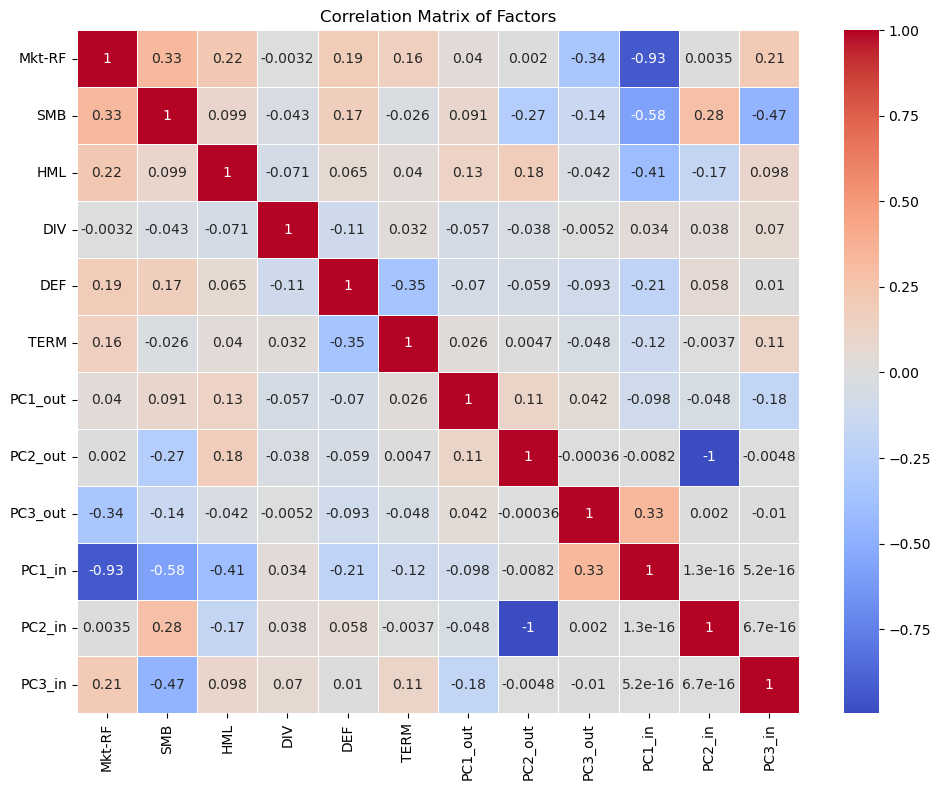

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = Factors.corr()

plt.figure(figsize=(10,8))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=True,  
    center=0, 
    linewidths=0.5
)
plt.title("Correlation Matrix of Factors")
plt.tight_layout()
plt.show()

In [34]:
pc_corr = Factors[["PC1_out","PC2_out","PC3_out","PC1_in","PC2_in","PC3_in"]].corr()
pc_corr.round(3)

,PC1_out,PC2_out,PC3_out,PC1_in,PC2_in,PC3_in
PC1_out,1.000,0.112,0.042,-0.098,-0.048,-0.180
PC2_out,0.112,1.000,-0.000,-0.008,-0.996,-0.005
PC3_out,0.042,-0.000,1.000,0.334,0.002,-0.010
PC1_in,-0.098,-0.008,0.334,1.000,0.000,0.000
PC2_in,-0.048,-0.996,0.002,0.000,1.000,0.000
PC3_in,-0.180,-0.005,-0.010,0.000,0.000,1.000


Text(0.5, 1.0, 'Correlation Matrix of In-sample & Out-of-sample Principal Components Factors')

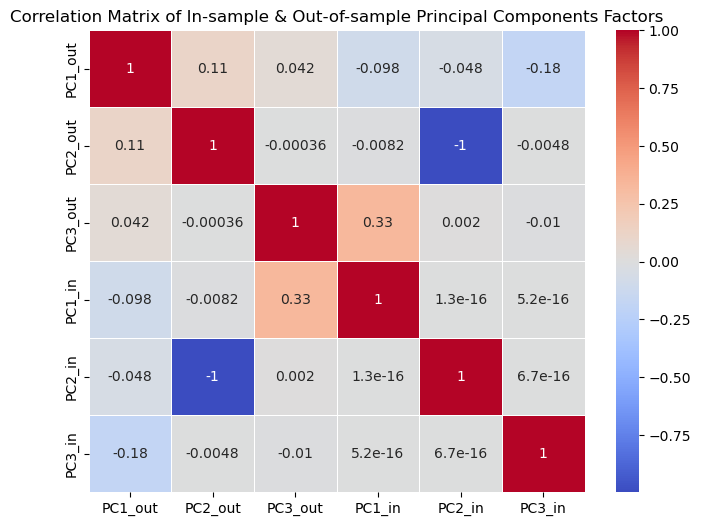

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(pc_corr, annot=True, center=0, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of In-sample & Out-of-sample Principal Components Factors")

### Part 2. Cross-sectional asset pricing test

### 1.

In [71]:
# Run Fama-MacBeth regression of excess returns on the factors

# Use the standard error and t-stat of the time-series average of the regression parameters
mu = Re.mean(axis=0)   # index: 25 portfolios

# Set factors
F_FF = Factors[["Mkt-RF", "SMB", "HML"]]
F_macro = Factors[["DIV", "DEF", "TERM"]]
F_pc_in = Factors[["PC1_in", "PC2_in", "PC3_in"]]
F_pc_out = Factors[["PC1_out", "PC2_out", "PC3_out"]]

import statsmodels.api as sm

def estimate_betas(Re, F):
    # 1) 날짜 교집합으로 맞추기
    idx = Re.index.intersection(F.index)
    Re_i = Re.loc[idx]
    F_i  = F.loc[idx]

    # 2) X 만들기
    X = sm.add_constant(F_i)
    X = X.replace([np.inf, -np.inf], np.nan)

    betas = pd.DataFrame(index=F.columns, columns=Re.columns, dtype=float)

    # 3) 포트폴리오별 회귀
    for p in Re_i.columns:
        y = Re_i[p].replace([np.inf, -np.inf], np.nan)

        df = pd.concat([y, X], axis=1).dropna()   # y, X 함께 NaN 제거
        y_clean = df.iloc[:, 0]
        X_clean = df.iloc[:, 1:]

        res = sm.OLS(y_clean, X_clean).fit()
        betas[p] = res.params[F.columns]          # beta만 저장

    return betas

def cross_sectional_test(mu, betas):
    X = sm.add_constant(betas.T)  # (25 x K)
    y = mu.loc[X.index]           # 포트폴리오 순서 맞추기
    res = sm.OLS(y, X).fit()
    return res

In [72]:
betas_ff    = estimate_betas(Re, F_FF)
betas_macro = estimate_betas(Re, F_macro)
betas_pc_in  = estimate_betas(Re, F_pc_in)
betas_pc_out = estimate_betas(Re, F_pc_out)

res_ff    = cross_sectional_test(mu, betas_ff)
res_macro = cross_sectional_test(mu, betas_macro)
res_pc_in  = cross_sectional_test(mu, betas_pc_in)
res_pc_out = cross_sectional_test(mu, betas_pc_out)

In [74]:
betas_ff.T

,Mkt-RF,SMB,HML
S1B1,1.313023,1.294893,0.398421
S1B2,1.089677,1.608454,0.335868
S1B3,1.077357,1.185413,0.467333
S1B4,0.965142,1.226436,0.590243
S1B5,0.989701,1.348229,0.905788
S2B1,1.074441,1.047452,-0.257318
S2B2,1.042729,0.992054,0.191840
S2B3,0.961280,0.863058,0.358610
S2B4,0.979996,0.821064,0.559824
S2B5,1.052511,0.935004,0.855163


In [75]:
res_ff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     5.102
Date:                Tue, 16 Dec 2025   Prob (F-statistic):            0.00828
Time:                        02:08:56   Log-Likelihood:                0.61535
No. Observations:                  25   AIC:                             6.769
Df Residuals:                      21   BIC:                             11.64
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2702      0.652      3.480      0.002       0.913       3.627
Mkt-RF        -1.6110      0.629     -2.559      0.018      -2.920      -0.302
SMB            0.2687      0.101      2.671      0.014       0.059       0.478
HML            0.2664      0.136      1.955      0.064      -0.017       0.550
==============================================================================
Omnibus:                       30.576   Durbin-Watson:                   1.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.619
Skew:                          -2.211   Prob(JB):                     1.40e-17
Kurtosis:                      10.414   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
def coef_table(res, name):
    s = res.params.copy()
    s.name = name
    return s

gamma_table = pd.concat([
    coef_table(res_ff, "FF3"),
    coef_table(res_macro, "Macro"),
    coef_table(res_pc_in, "PC_in"),
    coef_table(res_pc_out, "PC_out"),
], axis=1)

gamma_table.round(4)


,FF3,Macro,PC_in,PC_out
const,2.2702,-0.7309,-0.3524,1.3861
Mkt-RF,-1.6110,NaN,NaN,NaN
SMB,0.2687,NaN,NaN,NaN
HML,0.2664,NaN,NaN,NaN
DIV,NaN,0.0013,NaN,NaN
DEF,NaN,0.0056,NaN,NaN
TERM,NaN,0.0109,NaN,NaN
PC1_in,NaN,NaN,-5.8673,NaN
PC2_in,NaN,NaN,0.9806,NaN
PC3_in,NaN,NaN,1.1333,NaN


In [78]:
r2_table = pd.Series({
    "FF3": res_ff.rsquared,
    "Macro": res_macro.rsquared,
    "PC_in": res_pc_in.rsquared,
    "PC_out": res_pc_out.rsquared,
}).to_frame("R2").round(4)

r2_table

,R2
FF3,0.4216
Macro,0.4622
PC_in,0.7462
PC_out,0.5350


In [79]:
pred_mu = pd.DataFrame({
    "actual_mu": mu,
    "FF3": res_ff.fittedvalues,
    "Macro": res_macro.fittedvalues,
    "PC_in": res_pc_in.fittedvalues,
    "PC_out": res_pc_out.fittedvalues,
})

pred_mu.head()

,actual_mu,FF3,Macro,PC_in,PC_out
S1B1,0.432524,0.608863,0.896241,0.517988,0.936963
S1B2,0.797360,1.036261,1.142847,1.177062,1.003756
S1B3,1.007534,0.977475,0.797134,1.019737,0.767830
S1B4,1.153015,1.202017,0.763493,0.920288,1.058093
S1B5,1.381397,1.279218,0.963921,1.002916,1.071816


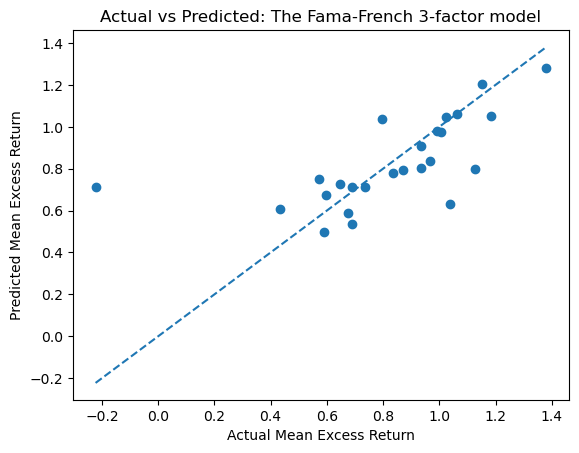

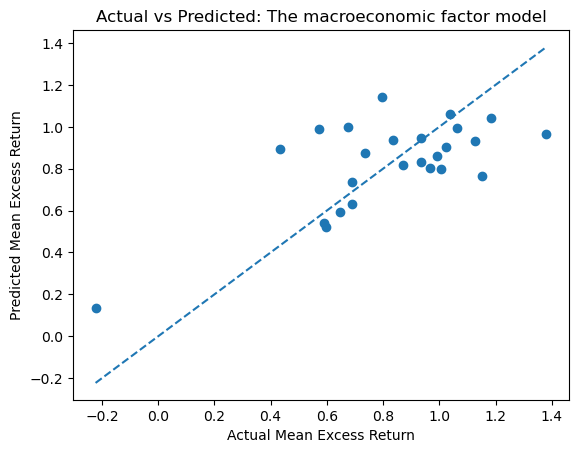

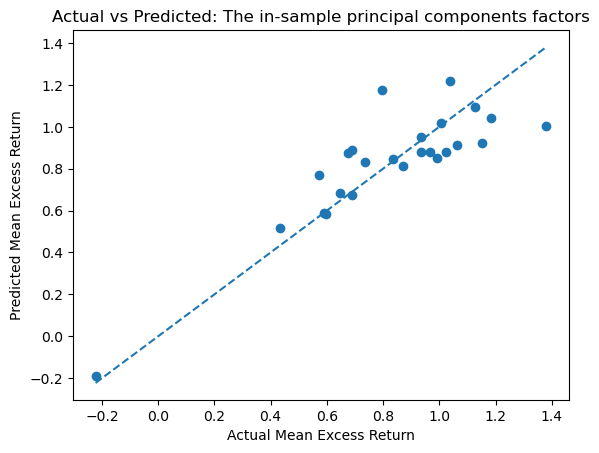

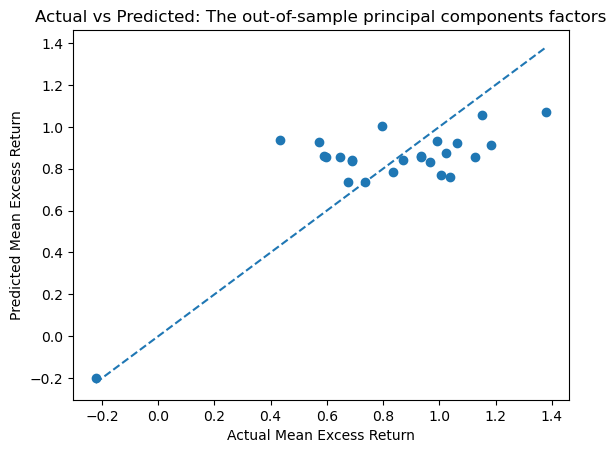

In [86]:
import matplotlib.pyplot as plt

models = ['FF3', 'Macro', 'PC_in', 'PC_out']
model_names = ["The Fama-French 3-factor model", "The macroeconomic factor model", "The in-sample principal components factors", "The out-of-sample principal components factors"]

for m in models:
    plt.figure()
    plt.scatter(pred_mu["actual_mu"], pred_mu[m])
    plt.plot(
        [pred_mu["actual_mu"].min(), pred_mu["actual_mu"].max()],
        [pred_mu["actual_mu"].min(), pred_mu["actual_mu"].max()],
        linestyle="--"
    )
    plt.xlabel("Actual Mean Excess Return")
    plt.ylabel("Predicted Mean Excess Return")
    plt.title(f"Actual vs Predicted: {model_names[models.index(m)]}")
    plt.show()